# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [399]:
pwd

'/Users/sushamajadhav/Applications'

In [400]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [401]:
data = pd.io.stata.read_stata('us_job_market_discrimination.dta')

In [402]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [403]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

Chi-Square test is applicable as this is a Categorical Data.We can use the chi-square test for independence.As the sample size is greater than 30 obervations we can apply Central Limit theorem to this Data and assume that all the data points are independent to each other.

# 2.Hypothesis

H0- People with black sounding name have equal chance of being called back.


H1 - People with black sounding name have less chance of being called back

In [404]:
x=data[['race','call']]
x.shape

(4870, 2)

In [407]:
df_mean = []

for i in range(10000):
    x.sample(frac=1,replace=True)
    df_mean.append(np.mean(x[x.race=="b"]['call']))

    
    

In [408]:
n1=len(x[x.race=="b"])
n2=len(x[x.race=="w"])
xbar1=np.mean(x[x.race=="b"]['call'])
xbar2=np.mean(x[x.race=="w"]['call'])

#compute s1
s1=np.std(x[x.race=="b"].call)

#compute s2
s2=np.std(x[x.race=="w"].call)

dfreedom=len(x[x.race=="w"])+len(x[x.race=="b"])-2

t=stats.t.ppf(1-0.025, dfreedom)
test=(xbar1-xbar2)/np.sqrt(s1**2/n1+s2**2/n2)
#pvalue=2*P(t>|Test Statistics|)
pvalue=2*(1-stats.t.cdf(abs(test),dfreedom))
#compute Margin of error
me=t*np.sqrt(s1**2/n1+s2**2/n2)
ll=xbar1-xbar2-me
ul=xbar1-xbar2+me

print('margin of error is: {}, confidence interval is: {}, p-value is: {}'.format(me,[ll,ul],pvalue))

margin of error is: 0.015258797951013666, confidence interval is: [-0.047291652806074246, -0.01677405690404691], p-value is: 3.92587953657042e-05


# Answer to Q3

Lets Assume 95% confidence interval

In [409]:
num_black=len(x[x.race=="b"])
num_white=len(x[x.race=="w"])
print(n1,n2)

2435 2435


In [410]:
callback_black=sum(x[x.race=="b"]['call'])
callback_black

callback_white=sum(x[x.race=="w"]['call'])
print(callback_black,callback_white)

157.0 235.0


In [411]:
percent_white = callback_white/num_white
percent_white

0.09650924024640657

In [412]:
percent_black = callback_black/num_black
percent_black

0.06447638603696099

In [413]:
diff=percent_white-percent_black


In [414]:
Std_error_black = (percent_black * (1 - percent_black)) / num_black
Std_error_white = (percent_white * (1 - percent_white)) / num_white
SE = math.sqrt(Std_error_black + Std_error_white)
SE

0.0077833705866767544

# Bootstrapping

In [415]:
b_race = (x[x.race=="b"]['call'])

b_race
x_b = np.array(b_race)

w_race = (x[x.race=="w"]['call'])
x_w = np.array(w_race)



In [416]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [417]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates


In [418]:
bs_replicates = draw_bs_reps(x_b,np.mean,size=10000)
bs_replicates

array([0.06406571, 0.0661191 , 0.05954826, ..., 0.0587269 , 0.07104723,
       0.06735113])

In [419]:
bw_replicates = draw_bs_reps(x_w,np.mean,size=10000)
bw_replicates



array([0.09691992, 0.10431211, 0.09240247, ..., 0.10472279, 0.08829569,
       0.09568789])

In [420]:
for i in range(10000):
    d = bs_replicates-bw_replicates
    


/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


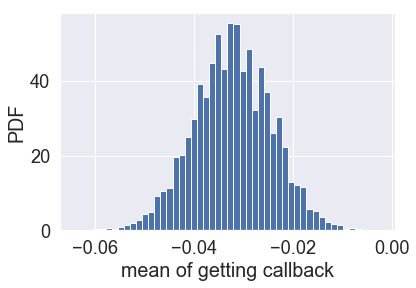

In [421]:
# Make a histogram of the results
_ = plt.hist(d, bins=50, normed=True)
_ = plt.xlabel('mean of getting callback')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [422]:
#Assume the 95% of confidence interval
np.percentile(d, [2.5, 97.5])

array([-0.04763861, -0.01683778])

Margin of error

In [423]:
y=np.std(d)
print(2*y)



0.015761837360893052


# P-Value

In [463]:
callback_black=np.mean(x[x.race=="b"]['call'])
callback_black

0.0644763857126236

In [464]:
callback_white=np.mean(x[x.race=="w"]['call'])
callback_white

0.09650924056768417

In [465]:
diff_of_means(w_race,b_race)

0.03203285485506058

In [466]:
def permutations_1(data1,data2):
    data = np.concatenate((data1,data2))
    return data

In [467]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [468]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)
        #print(perm_sample_1)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)
        #print(perm_replicates[i])
        

    return perm_replicates

In [478]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(w_race,b_race)
#empirical_diff_means = diff_of_means(w_race,b_race)



# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(w_race, b_race,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
#p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)


# Print the result
print('p-value =', p)


p-value = 0.0


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

In [43]:
#For 95% confidence interval, the critical z value is 1.96.

ME= 1.96*SE
ME

0.015255406349886438

In [44]:
CI=[diff-ME, diff+ME]
CI

[0.016777447859559147, 0.047288260559332024]

In [45]:
Z = (diff-0)/SE
Z

4.11555043573

Using Scipy.stats

In [46]:
import scipy.stats as stats
stats.ttest_ind(x[x.race=="b"]['call'], x[x.race=="w"]['call'],equal_var=False)

Ttest_indResult(statistic=-4.114705290861751, pvalue=3.942941513645935e-05)

We can say that as our z statistics is 4.11 for using bootstrap and stats package and p values is less than 0.05 so we
can reject null hypothesis.We can say that there is a significant difference between the callback rates for black sounding 
and white names

I dont think that race/name is the most important factor in callback success.It may need to find out the relation with respect
to other factors about education and work experience etc before making such assumption

In [47]:
pwd()

'/Users/sushamajadhav/Applications'